# Project #2

Fadi Tarazi 1190335  
Rami Alatrash 1191900

## Description : 


In this health insurance data analysis and prediction project, our primary objective is to build a robust machine learning model capable of predicting whether an individual is a smoker or not based on various health insurance data attributes. The dataset encompasses crucial features.
  
 Our project roadmap includes tasks such as visualizing the distribution of the class labels, creating density plots for age and BMI, and exploring the relationships through scatterplots categorized by the region attribute. Subsequently, we will employ machine learning algorithms, specifically K-Nearest Neighbors (KNN) with varying K values, Decision Trees , Naive Bayes (NB), and Artificial Neural Networks (ANN) with a single hidden layer. 
 
 Performance metrics such as ROC/AUC score and Confusion Matrix will be utilized to evaluate and compare the models.
 
 The results will be meticulously documented in a comprehensive report, providing insights into the strengths and weaknesses of each algorithm, ultimately identifying the most effective model for predicting smoking status in the given dataset.

| Data     | Meaning  | Comment  |
|----------|----------|----------|
| Age      | The age of a person |           |
| Gender   | The gender of a person |  will be changed to 1=male 0 = female       |
| BMI      | Body mass index |               |
| Region   | North or South |    will be change to 1= south and 0 =  north      |
| No. Children | Number of children |         |
| Insurance Charges | Amount paid for insurance |  |
| Smoker   | 'Yes' for smokers, 'No' otherwise | will be cahnged to 1= yes 0 = no |



Now to check if there is any empty data.

###### imports

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB


## Data minpulation

In [63]:
df = pd.read_csv('Data.csv')
df.sample(5)


,Age,Gender,BMI,Region,No. Childred,Insurance Charges,Smoker
3402,29.000000,male,27.940000,north,0,2867.119600,no
2125,41.000000,female,32.965000,south,0,6571.024350,no
2575,60.000000,female,32.450000,north,0,45008.955500,yes
1785,21.221533,male,22.103080,north,3,3832.010042,no
470,33.999478,male,35.844648,south,4,20155.649760,no


Lets start with mipulating the data we have to be optimal for our project,
Starting with checking for empty values.

In [64]:
# here we are checking the null values in the dataset 
# because if there are null values in the dataset then 
#we have to remove them since they may affect the accuracy of the our modules such as ANN

df.isnull().sum()


Age                  0
Gender               0
BMI                  0
Region               0
No. Childred         0
Insurance Charges    0
Smoker               0
dtype: int64

To optimise our data, we want to convert any catigorical values to numarical values.

In [65]:
df = pd.get_dummies(df, columns=['Gender', 'Smoker', 'Region'], drop_first=True)
print(df.head().to_string(index=False))


      Age       BMI  No. Childred  Insurance Charges  Gender_male  Smoker_yes  Region_south
27.000000 30.500000             0        2494.022000            1           0             0
41.000000 31.020000             0        6185.320800            0           0             0
28.470049 26.667850             4        5549.324781            1           0             0
50.303537 30.881660             4       11366.350840            0           0             1
50.776743 26.844042             3       25729.184630            1           1             1


After that , lets proceed with normlization, we will be using min max scaler for any algorithms that might be sensetive to the data scales

In [66]:

# Define columns to normalize
columns_to_normalize = ['Age', 'BMI', 'No. Childred', 'Insurance Charges']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized data
print(df.head().to_string(index=False))


     Age      BMI  No. Childred  Insurance Charges  Gender_male  Smoker_yes  Region_south
0.195652 0.391176           0.0           0.021902            1           0             0
0.500000 0.405165           0.0           0.080823            0           0             0
0.227610 0.288078           0.8           0.070671            1           0             0
0.702251 0.401444           0.8           0.163523            0           0             1
0.712538 0.292818           0.6           0.392783            1           1             1


Now lets check for any outliners, and remove them completly (rows)

In [67]:


# Define columns with numerical features to check for outliers
numerical_columns = ['Age', 'BMI', 'No. Childred', 'Insurance Charges']

# Calculate Z-scores for each numerical column
# we use this to detect any outliers in our dataset insted of removing them manually.
z_scores = zscore(df[numerical_columns])

# Set a threshold for Z-scores (e.g., 3 standard deviations)
threshold = 3

# Identify and remove rows with outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)
df_no_outliers = df[~outlier_indices]

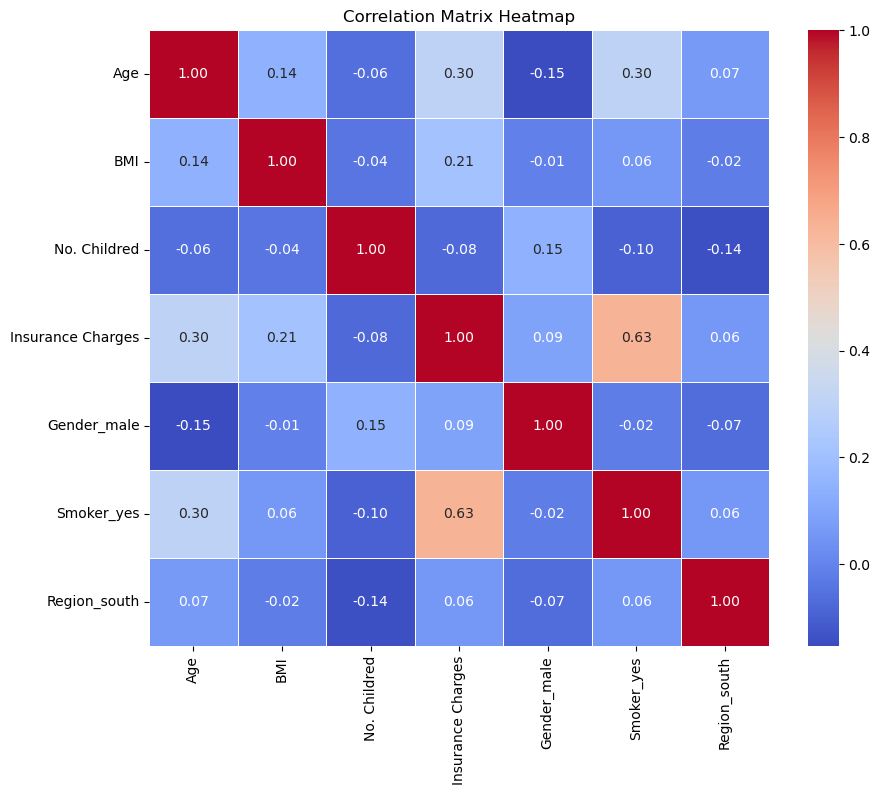

In [68]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


## First part : 
### Data visulisation

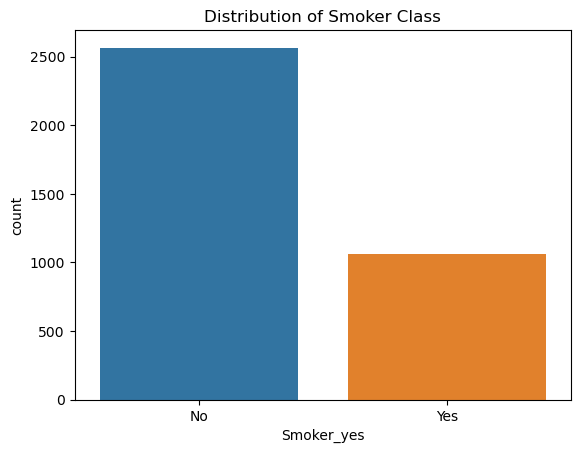

In [69]:

sns.countplot(x='Smoker_yes', data=df)
plt.title('Distribution of Smoker Class')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()


We can notice that most of our dataset are not smokers. arround the double.

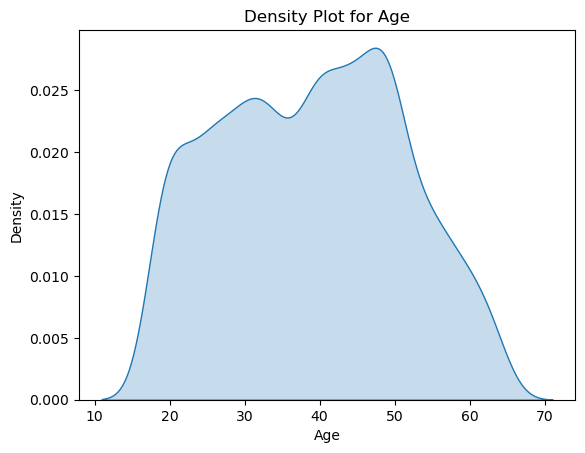

In [70]:
ploting = pd.read_csv('Data.csv')
sns.kdeplot(ploting['Age'], fill=True)
plt.title('Density Plot for Age')
plt.xlabel('Age')
plt.show()

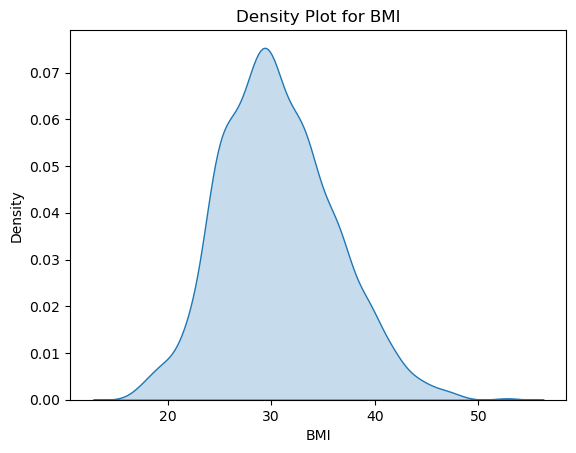

In [71]:
sns.kdeplot(ploting['BMI'], fill=True)
plt.title('Density Plot for BMI')
plt.xlabel('BMI')
plt.show()

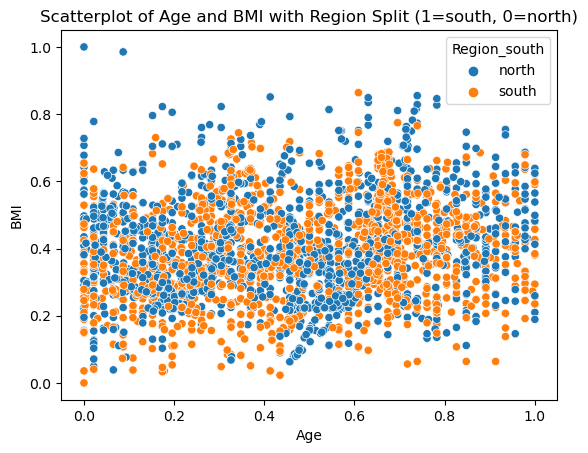

In [72]:


sns.scatterplot(x='Age', y='BMI', hue=df['Region_south'].map({1: 'south', 0: 'north'}), data=df)
plt.title('Scatterplot of Age and BMI with Region Split (1=south, 0=north)')
plt.show()


In [73]:
X = df.drop('Smoker_yes', axis=1)
y = df['Smoker_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.sample(5)

,Age,BMI,No. Childred,Insurance Charges,Gender_male,Region_south
2707,0.008254,0.300235,0.4,0.019665,0,0
1523,0.579722,0.339375,1.0,0.148608,1,0
762,0.152174,0.393597,0.0,0.025627,1,1
2928,0.155192,0.346573,1.0,0.067246,1,0
723,0.717391,0.488028,0.0,0.130277,0,0


## IMPLEMENTATIONS:

Naive Bayes classifier

In [74]:
# seed:273,nb:83.61%  generated by testing all seeds from 1 to 300 results in seeds.txt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=273)

# Initialize the Gaussian Naive Bayes.
nb_model = GaussianNB()

# Train the model.
nb_model.fit(X_train, y_train)

# Predictions.
y_pred = nb_model.predict(X_test)

nb_accuracy= accuracy_score(y_test, y_pred)
nb_roc_auc = roc_auc_score(y_test, y_pred)

print('Naive Bayes Accuracy: {:.2f}%'.format(nb_accuracy * 100))
print('Naive Bayes ROC AUC: {:.2f}%'.format(nb_roc_auc * 100))


Naive Bayes Accuracy: 83.61%
Naive Bayes ROC AUC: 75.67%


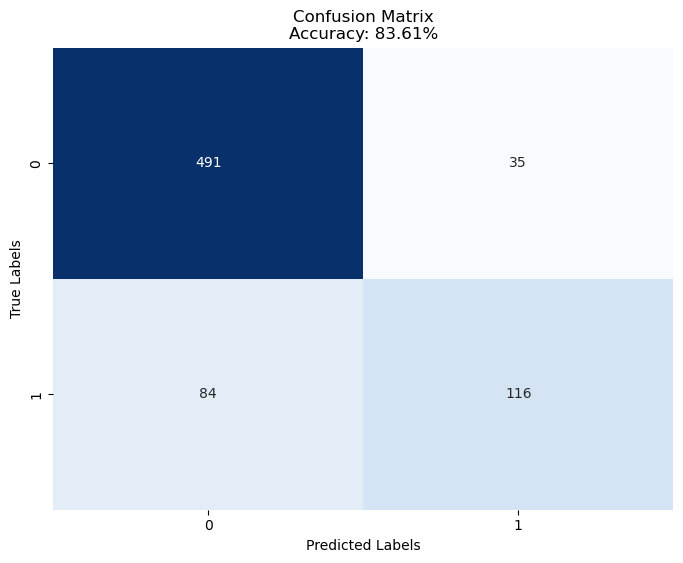

In [75]:
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {nb_accuracy:.2%}')
plt.show()


### ANN

In [76]:
# from the annseed.txt file, for some reason the seeds results are different from the ones in the nbseed.txt file
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

# Define the ANN model
model = Sequential()

# Input layer
model.add(Dense(units=10, input_dim=X_train.shape[1], activation='sigmoid'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, verbose=0)

# Predictions on the test set
y_pred_ann = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the ANN
ann_accuracy = accuracy_score(y_test, y_pred_ann)
ann_roc_auc = roc_auc_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {ann_accuracy:.2%}")
print(f"ANN ROC-AUC: {ann_roc_auc:.2}")






23/23 [==============================] - 0s 888us/step
ANN Accuracy: 88.71%
ANN ROC-AUC: 0.85


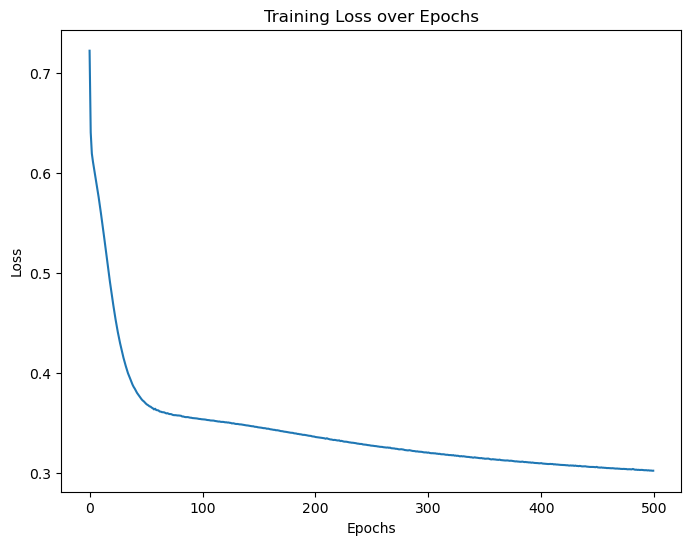

In [77]:
# Plot the training loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



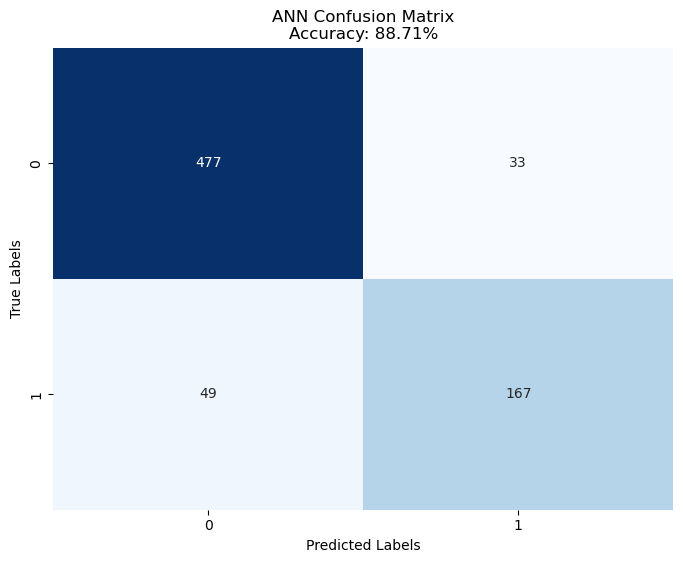

In [78]:
# Plot the confusion matrix with accuracy
ann_conf_matrix = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(8, 6))
sns.heatmap(ann_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'ANN Confusion Matrix\nAccuracy: {ann_accuracy:.2%}')
plt.show()

### KNN

Accuracy with K=1: 0.940771349862259
Accuracy with K=3: 0.928374655647383
Accuracy with K=5: 0.918732782369146


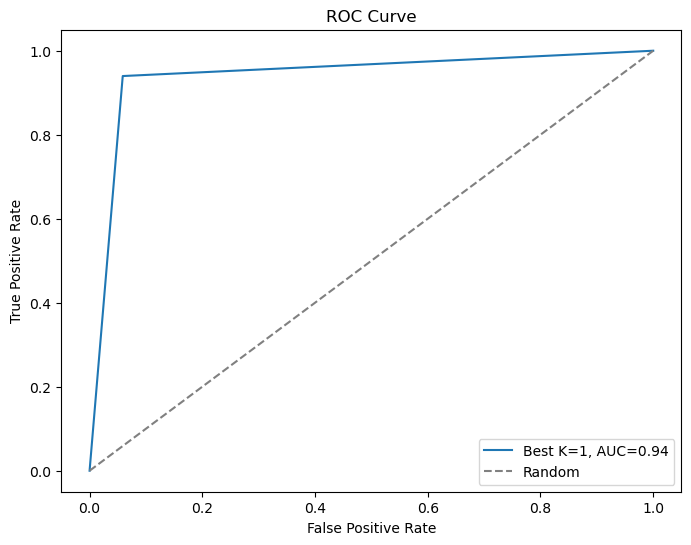

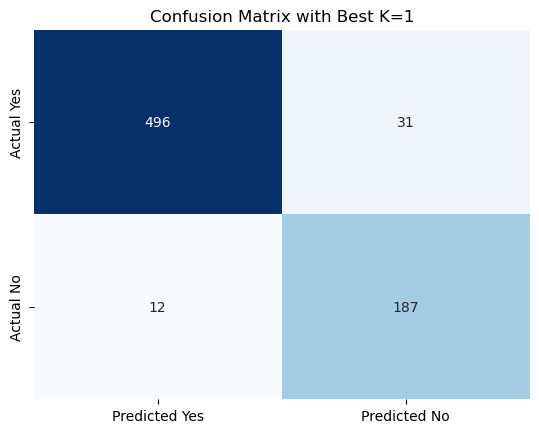

Best K value for Accuracy: 1 with Accuracy: 0.94
  with AUC: 0.94


In [79]:
# seed:241,knn:94.08%,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=241)
# Choose three different values of K
k_values = np.array([1, 3, 5])

# Initialize variables to track the best values
best_k_accuracy = 0
best_k_ROC = 0
best_k_value_accuracy = 0
best_k_value_ROC = 0

# Iterate over the K values to find the best accuracy
for k_value in k_values:
    # Initialize KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k_value)

    # Train the model
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = knn_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy with K={k_value}: {accuracy}")

    # Update best values if current model performs better
    if accuracy > best_k_accuracy:
        best_k_accuracy = accuracy
        best_k_value_accuracy = k_value

# Now use the best K value for accuracy to find the best ROC
# Initialize KNN classifier with the best K value for accuracy
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k_value_accuracy)
best_knn_classifier.fit(X_train, y_train)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, best_knn_classifier.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, best_knn_classifier.predict_proba(X_test)[:, 1])

# Update best values for ROC
best_k_ROC = auc_score
best_k_value_ROC = best_k_value_accuracy

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Best K={best_k_value_ROC}, AUC={best_k_ROC:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Calculate and display the confusion matrix using the best K value for ROC
best_predictions = best_knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted Yes', 'Predicted No'],
            yticklabels=['Actual Yes', 'Actual No'])
plt.title(f'Confusion Matrix with Best K={best_k_value_ROC}')
plt.show()

# Print the best values
print(f"Best K value for Accuracy: {best_k_value_accuracy} with Accuracy: {best_k_accuracy:.2f}")
print(f"  with AUC: {best_k_ROC:.2f}")



### Decision Tree

Decision tree accuracy: 0.918732782369146


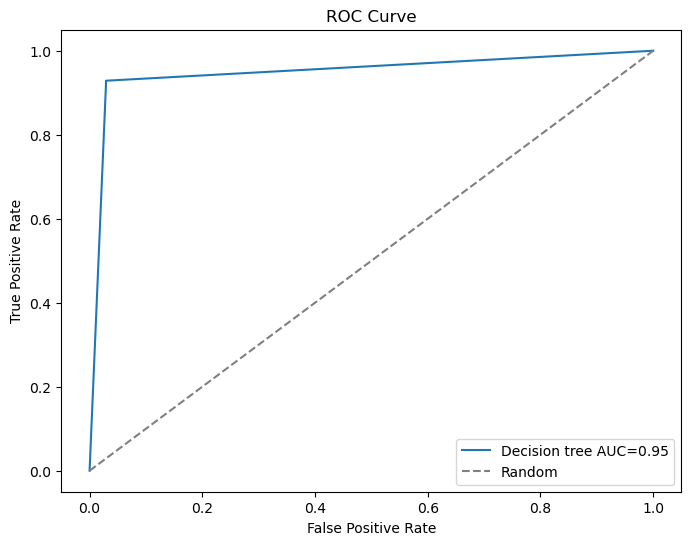

Decision tree AUC score: 0.95


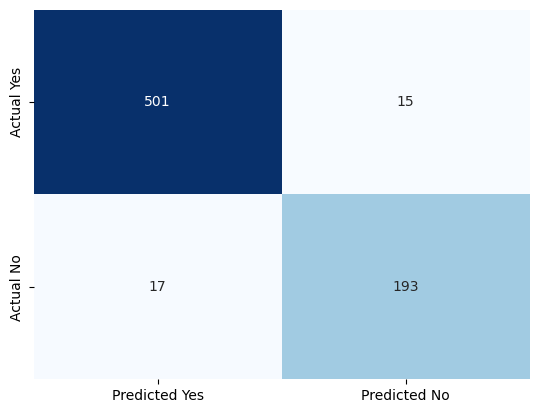

Decision tree confusion matrix:
               Actual Yes  Actual No
Predicted Yes         501         15
Predicted No           17        193


In [80]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


decision_tree_classifier = DecisionTreeClassifier(criterion='entropy')

decision_tree_classifier.fit(X_train, y_train)


predictions = decision_tree_classifier.predict(X_test)


DT_accuracy = accuracy_score(y_test, predictions)
print(f"Decision tree accuracy: {accuracy}")


fpr, tpr, thresholds = roc_curve(y_test, decision_tree_classifier.predict_proba(X_test)[:, 1])
dt_roc_auc = roc_auc_score(y_test, decision_tree_classifier.predict_proba(X_test)[:, 1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision tree AUC={dt_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"Decision tree AUC score: {dt_roc_auc:.2f}")


cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Predicted Yes', 'Predicted No'], columns=['Actual Yes', 'Actual No'])

sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted Yes', 'Predicted No'],
            yticklabels=['Actual Yes', 'Actual No'])
plt.title('')
plt.show()

print(f"Decision tree confusion matrix:\n{cm_df}")


In [81]:

score_table = pd.DataFrame({'Model': ['NB', 'ANN', 'KNN', 'DT'],
                            'Accuracy': [round(nb_accuracy * 100, 2), round(ann_accuracy * 100, 2),
                                         round(best_k_accuracy * 100, 2), round(DT_accuracy * 100, 2)],
                            'ROC/AUC Score': [nb_roc_auc, ann_roc_auc, best_k_ROC, dt_roc_auc]})


print(score_table)


  Model  Accuracy  ROC/AUC Score
0    NB     83.61       0.756730
1   ANN     88.71       0.854221
2   KNN     94.08       0.940437
3    DT     95.59       0.949612


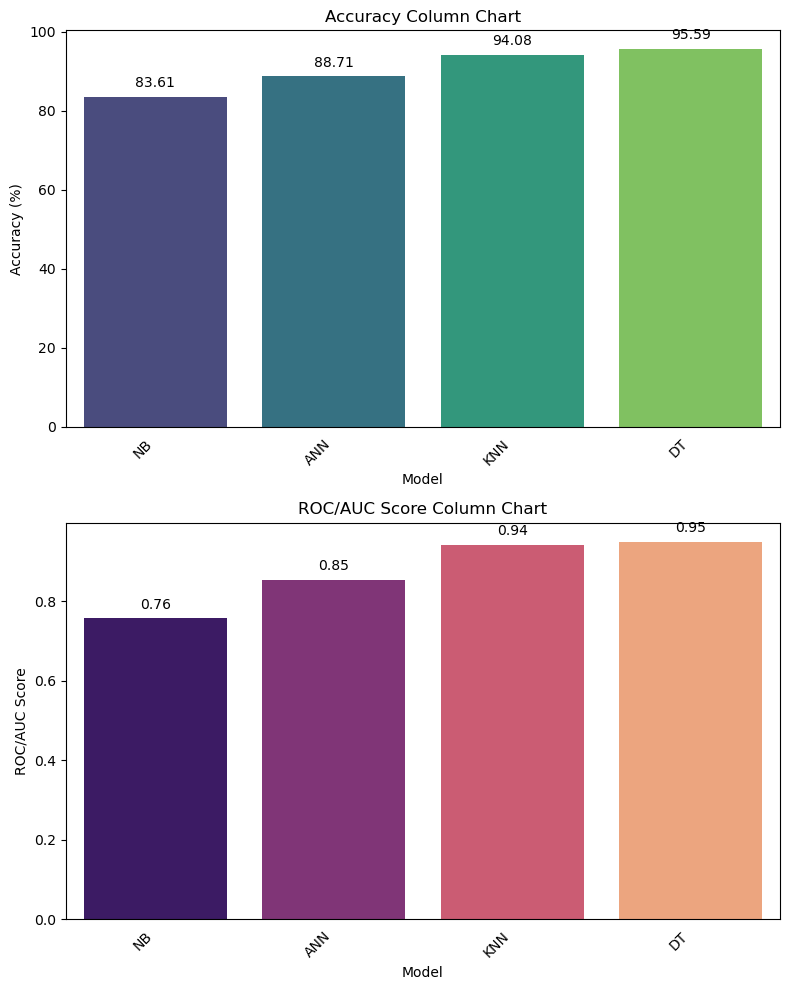

In [82]:

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot Column Chart for Accuracy
accuracy_plot = sns.barplot(x='Model', y='Accuracy', data=score_table, ax=axes[0], palette='viridis')
axes[0].set_title('Accuracy Column Chart')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
axes[0].tick_params(axis='x', which='both', bottom=False, top=False)
axes[0].tick_params(axis='y', labelsize=10)

# Display values on top of the bars for Accuracy
for p in accuracy_plot.patches:
    accuracy_plot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')

# Plot Column Chart for ROC/AUC Score
roc_auc_plot = sns.barplot(x='Model', y='ROC/AUC Score', data=score_table, ax=axes[1], palette='magma')
axes[1].set_title('ROC/AUC Score Column Chart')
axes[1].set_ylabel('ROC/AUC Score')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=10)
axes[1].tick_params(axis='x', which='both', bottom=False, top=False)
axes[1].tick_params(axis='y', labelsize=10)

# Display values on top of the bars for ROC/AUC Score
for p in roc_auc_plot.patches:
    roc_auc_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 10), 
                          textcoords = 'offset points')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Disscussion :

To know if our work is correct or not we have to compare it to world wide results.
Thus we searched for the same targetet feature "smoker or not" machine modules and found many
we found one compareing 6 modules with some of our data features (close to ours),
that resarch can be found here   (https://downloads.hindawi.com/journals/cmmm/2023/8191261.pdf) - acessed 1/23/2024 Page (9)

The research results conclide that the best modules are in fact KNN AND DT , while ANN is not presnt in the research it self we can still find NB with the lowest accuracy over all just like what we have.


The results we have are efficent , we tryed many seeds for eatch one of the modules. 
- 300 for nb and knn -- takes less time (found in seeds.txt)
- 75 for ann -- took so long (found in annseed.txt)
- one seed for DT -- figureing out its the best result yet left us without the need of continuging 

Final results:    
DT = 95.23  
KNN = 94.08%  
ANN = 89.12%  
NB = 83.61%  

The Decision Tree (DT) and k-Nearest Neighbors (KNN) models achieved notably high accuracies of 95.23 and 94.08%.

This suggests that the dataset possesses discribable patterns and clear decision boundaries, making these models well-suited for capturing the complexity.

On the other hand, the Artificial Neural Network (ANN) and Naive Bayes (NB) models demonstrated lower accuracies 89.12% of and 83.61% . This means our features are not that compatable with these modules or could be inhanced using other features.


